<a id="1"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span> Introduction</div>


<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">1.1 <span style='color:#CDA63A'>|</span> Outlining the project</div>
       

Customer churn refers to the situation when a firm or service loses customers or subscribers.

In the highly competitive telecommunications industry, customers have many service providers to choose from and frequently switch between them. The annual churn rate for this sector ranges between 15% and 25%.

Because most firms have a large number of customers, it is challenging to provide individualized customer retention efforts to each of them. Devoting excessive time and resources to each customer is not feasible, as it would outweigh the additional revenue. However, if a company could anticipate which customers are likely to discontinue their services, it could focus retention efforts solely on these "high risk" clients. Ultimately, the goal is to expand the customer base and enhance customer loyalty, which is the key to success in this market.

Customer churn is a vital metric because it is less expensive to retain existing customers than to acquire new ones. To minimize customer churn, telecommunications firms must predict which customers are at high risk of leaving.

To detect early signs of potential churn, it is necessary to have a comprehensive understanding of the customers and their interactions across various channels, such as in-store visits, product purchase histories, customer service calls, web-based transactions, and social media interactions.

Therefore, addressing churn is critical for businesses to not only maintain their market position but also thrive and grow. The more customers a company has in its network, the lower the cost of initiation and the higher the profit. As a result, reducing client attrition and implementing an effective retention strategy are key factors in a company's success.

# Some initial feature engineering/ cleaning up:
1. Get rid of ID
2. Deal with NaN values
3. Deal with outliers

<a id="1.2"></a>
## <b>1.2 <span style='color:#E1B12D'>My plan:</span></b>
## H0: the users' characteristics as well as the type of their plan **bear no correlation** to their churning rate
## My alternative hypothesis (formulated after initial exploration) is: certain variables such as **tenure, total charge, monthly charge as well as package variables** correlate to the churning rate and **can be used to predict whether the user will churn**.

## This is extremely important for the business side of Telco as retaining customers is more cost effective rather than trying to attrach new ones

<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">2 <span style='color:#CDA63A'>|</span> Cleaning Up</div>

In [144]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import missingno as msno

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

customer_data = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
customer_data.head()

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [145]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


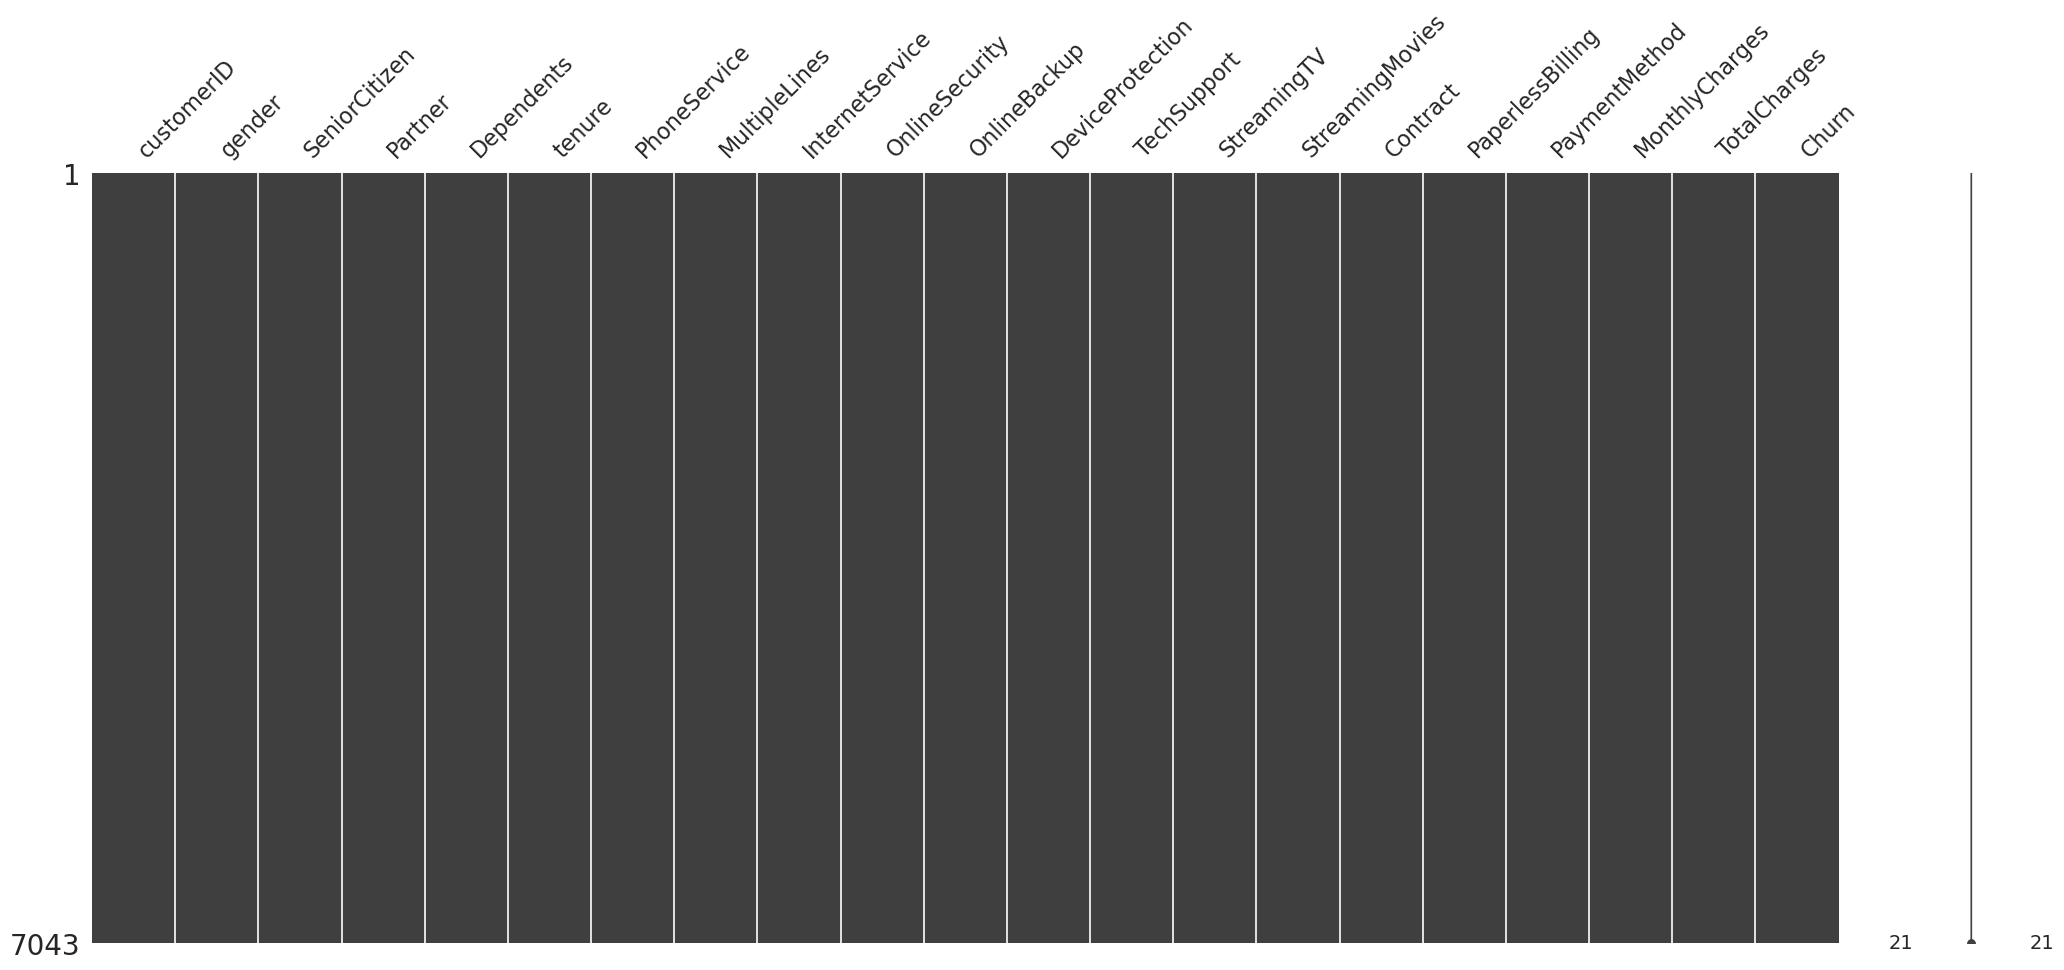

In [146]:
msno.matrix(customer_data);

Out of the 21 columns there are:

    1. Primary key (customer id)
    2. Boolean encoders (eg. Partner, Churn)
    3. Binary encoders (eg. SeniorCitizen)
    4. Float values (eg. tenure)
    5. Categorical values (eg. Multiple lines)
    
First task: standardise the encoders into one type and since most are boolean, we'll convert the senior citizen to a boolean one as well
+ total charges as int

In [147]:
customer_data['SeniorCitizen'] = customer_data['SeniorCitizen'].apply(lambda x: "Yes" if x == 1 else "No")

In [148]:
customer_data["TotalCharges"] = pd.to_numeric(customer_data["TotalCharges"] , errors = "coerce")
customer_data["TotalCharges"].isnull().sum()

11

### Checking for NaN values

In [149]:
customer_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [150]:
customer_data[np.isnan(customer_data['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


We can also notice that in the entries where the TotalCharges field is empty, the tenure has a value of 0.

In [151]:
customer_data.drop(labels=customer_data[customer_data['tenure'] == 0].index, axis=0, inplace=True)
customer_data[customer_data['tenure'] == 0].index

Int64Index([], dtype='int64')

In [152]:
customer_data.fillna(customer_data["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [153]:
customer_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [154]:
customer_data = customer_data.drop(['customerID'], axis = 1)
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Divide into categorical and numerical variables

In [155]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
customer_data[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Outliers:
+ Boxplots are an easy visual way to display any outliers

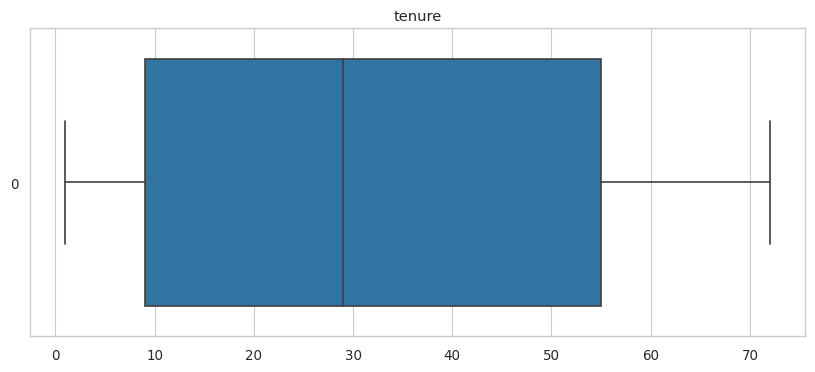

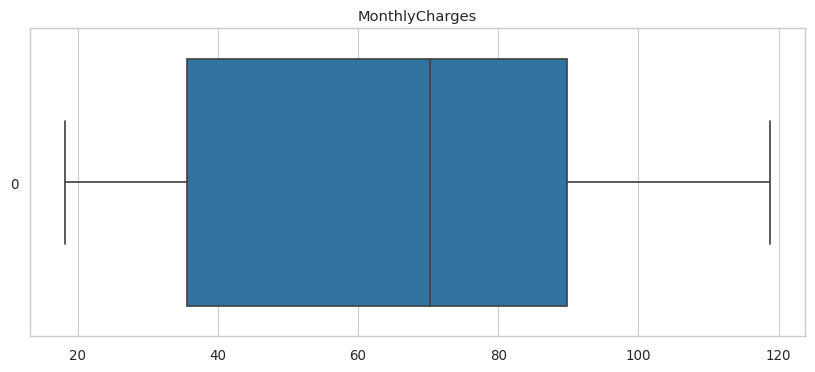

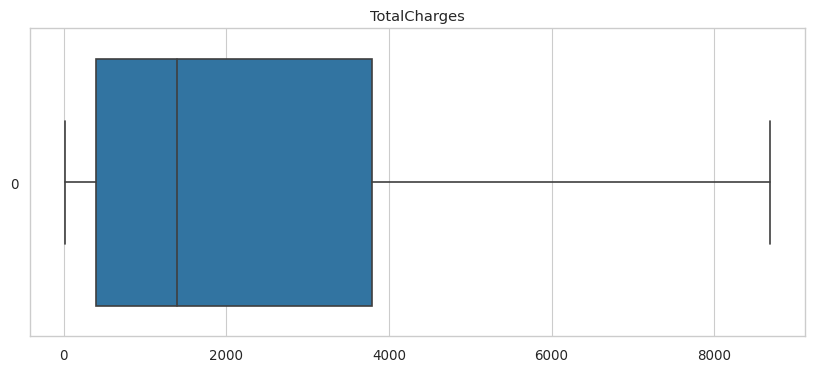

In [156]:
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title(i)
    sns.boxplot(df, orient= "horizontal")
    plt.show()

for i in numerical_cols:
    Box_plots(customer_data[i])

### No obvious outlers present in the numerical variables

## Label encoding for the graph building

In [158]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = customer_data.copy(deep = True)
text_data_features = [i for i in list(customer_data.columns) if i not in list(customer_data.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

TypeError: 'list' object is not callable

In [ ]:
df_graph = df1.drop("Churn", axis = 1)

In [ ]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

<a id="2"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">3 <span style='color:#CDA63A'>|</span> Exploration</div>

### Heatmap to compare the differences between the churned and not-churned users

In [ ]:
import seaborn as sns

# define the datasets
churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T
difference = not_churn - churn

#Drop variables
difference = difference.drop('Churn')
churn = churn.drop("Churn")
not_churn = not_churn.drop("Churn")
cmap = sns.color_palette("RdYlGn", as_cmap=True)
#White color palette
white_palette = sns.color_palette("Greys", as_cmap=True)

#Three plots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
plt.subplot(1, 3, 1)
sns.heatmap(churn[['mean']], annot=True, cmap=white_palette, vmin=0, vmax = 1000000, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Churned Customers');

plt.subplot(1, 3, 2)
heatmap = sns.heatmap(difference[['mean']], annot=True, cmap=cmap, vmin=-1, vmax=1, linewidths=0.4, linecolor='black', cbar_kws={"orientation": "vertical", "ticks": [-1, 0, 1]}, fmt='.2f')
plt.title('Difference');
cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, 0, 1])
cbar.set_ticklabels(['Churned dominance', 'No difference', 'Not Churned dominance'])

plt.subplot(1, 3, 3)
sns.heatmap(not_churn[['mean']], annot=True, cmap=white_palette, linewidths=0.4, vmin=0, vmax = 1000000, linecolor='black', cbar=False, fmt='.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad=0)


In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
customer_data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
customer_data['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_dummies = pd.get_dummies(customer_data)

df_dummies_sorted = df_dummies.corr()['Churn'].sort_values(ascending = False)
df_dummies_sorted_desc = df_dummies.corr()['Churn'].sort_values(ascending = True)

df_dummies_sorted.plot(kind='bar', label = True)

df_dummies_strong_above = df_dummies_sorted.apply(lambda x :x if x>0.3 else None).dropna()
strong_above = df_dummies_strong_above.index
df_dummies_strong_above.dropna()

ax.bar(strong_above, df_dummies.corr()['Churn'].loc[strong_above], color='green', alpha=0.5)


## We can zoom in on values which have a correlation of +- 0.3 which signifies a strong correlation

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

customer_data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
customer_data['Churn'].replace(to_replace='No',  value=0, inplace=True)

df_dummies = pd.get_dummies(customer_data)

df_dummies_sorted = df_dummies.corr()['Churn'].sort_values(ascending=True)

df_dummies_strong_above = df_dummies_sorted.apply(lambda x: x if x > 0.3 else None).dropna()
strong_above = df_dummies_strong_above.index
df_dummies_strong_above.dropna()

df_dummies_strong_below = df_dummies_sorted.apply(lambda x: x if x < -0.3 else None).dropna()
strong_below = df_dummies_strong_below.index
df_dummies_strong_below.dropna()

ax.bar(strong_above, df_dummies.corr()['Churn'].loc[strong_above], color='green', alpha=0.5)
ax.bar(strong_below, df_dummies.corr()['Churn'].loc[strong_below], color='orange', alpha=0.5)

ax.set_xticklabels(df_dummies_sorted.index, rotation=90)
ax.set_ylabel('Correlation with Churn')
ax.set_xlabel('Features')
ax.set_title('Feature Correlation with Churn')

plt.show()


In [ ]:
print(df_dummies_strong_above)

In [ ]:
print(df_dummies_strong_below)

### Takeaways: 
+ Contract type month-to-month, having no online security and no techsupport has the highest correlation
+ Contract type two year and tenure have the lease correlation

## Confirmation of the previous graph, we now have 8 variables that we should focus on (contract, tenure, total charge, monthly charge, online security, backup, tech support and device protection). perhaps also internet service

+ I will not be investigating variables such as: gender as I don't see a high correlation or a difference in the number of users

In [ ]:
plt.figure(figsize=(25, 10))

corr = df1.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

## This is interesting because it shows that customers who buy one add-on eg. OnlineSecurity are also likely to opt-in for tech supprt, streamingTV, etc.
## The red triangle shows us that users prefer to opt in for more than add-on at the same time

## And since opting out of OnlineSecurity and TechSupport is highly correlated to churning, perhaps there is some connection there too

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))

colors = ['#E94B3C','#2D2926']

for i in range(len(numerical_cols)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[numerical_cols[i]],color = colors[0])
    title = 'Distribution : ' + numerical_cols[i]
    plt.title(title)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 8))
sns.countplot(x="tenure", hue="Churn", data=df1)
plt.legend(["No Churn"], loc = "upper left")
plt.show()

In [ ]:
df1['MonthlyCharges_Group'] = [int(i / 5) for i in df1['MonthlyCharges']]
df1['TotalCharges_Group'] = [int(i / 500) for i in df1['TotalCharges']]


sns.countplot(x="TotalCharges_Group", hue = "Churn", data=df1, palette = colors,edgecolor = 'black')
plt.legend(['No Churn','Churn'],loc = 'upper left')
title = numerical_features[1 + i] + ' w.r.t Churn'
plt.title(title);

In [ ]:
df1['MonthlyCharges_Group'] = [int(i / 5) for i in df1['MonthlyCharges']]
df1['TotalCharges_Group'] = [int(i / 500) for i in df1['TotalCharges']]


sns.countplot(x="MonthlyCharges_Group", hue = "Churn", data=df1, palette = colors,edgecolor = 'black')
plt.legend(['No Churn','Churn'],loc = 'upper left')
title = numerical_features[1 + i] + ' w.r.t Churn'
plt.title(title);

Churn: 14*5 (70) - 21*5 (105) range

## Key points:
### + Tenure has two peaks: 0-5 and 70+. Out of those two peaks, the first 2 months are predominantly churners and the last month is predominantly not-churners (which probably signifies the 72+ group so should be diregarded as an information source)
### + Monthly Charges follow the same structure of two peaks (20 and 80).
### + Total Charges has a high negative slope, high right skew and a distinct pattern of most users having low total charges (0-2000) perhaps signifying that most are new 

### Questions to the business: what are the 

## Investigating the numerical variables

In [ ]:
import plotly.express as px
fig = px.box(df1, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

Basic stats:
+ Median for churned: 10 --- Median for no-churn: 38

Take-away:
+ Churn happens earlier than usual, pehaps it's related to customer dissatisfaction. 
+ My adivce to the customer retention team would be to focus on the users who have been users for less than 29 months as that it the upper quartile and contains 75% of all the users

## Monthly charges:

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 1) ],
                ax =ax, color="Blue", shade= True);

ax.axhline(y=0.01, color="black", linestyle="--")

ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

### Key points:
#### + This bimodal distribution shows that not-churned users are predominantly paying between the 0-40 range and the wide-trophed 40-120 range
#### + Additionally, churners have a higher tendency to churn at the specific prices of 20, 50 and most importantly around the 70-110 range
#### + The dotted line shows the price level at which there is more churners than there are non-churners

#### For the customer-retention team: **users who pay 70/110** are more likely to churn

## Total Charges:

In [ ]:
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 0) ],
                color="Gold", shade = True);
ax = sns.kdeplot(df1.TotalCharges[(df1["Churn"] == 1) ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');


## Investigating categorical variables:

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

<a id="1.2"></a>
## <b>3.2 <span style='color:#E1B12D'>Categorical variables vs tenure:</span></b>

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'tenure',data = customer_data,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l1[i]);



### Some interesting observations:
+ Having no partner makes you more likely to churn earlier than those who do have a partner
+ Senior citizens on average stay longer
+ Those who have dependents stay longer
+ Male/Female is about that same

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'tenure',data = customer_data,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'tenure',data = customer_data,hue = 'Churn',palette = colors);
plt.title('tenure vs ' + l2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'tenure',data = customer_data,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l2[i + 3]);


### Confirming my ideas from before: opting in for additional services does correlate to users staying for longer and churning later than those who do not opt-in

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'tenure',data = customer_data,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l2[i-4]);


### Generally: Having additional bundles contributes to users staying for longer

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (30,7))
for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'tenure',data = customer_data,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l3[i]);


### Securing a two year contract **is highly correlated** to users staying longer. As we can see, **users avoid breaking their contract** and therefore stay for at least 24 months as shown on  the first graph. With one year and month-to-month, users tend to churn out in their respective inter-quartile range with their churning covering the full range.

### Not going with paperlessbilling results in slighly higher churn rate at the beginning

### Electronic check and mailed check have half the median that of bank transfer and credit card

<a id="3.3"></a>
## <b>3.3 <span style='color:#E1B12D'>Categorical variables vs tenure:</span></b>

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'MonthlyCharges',data = customer_data,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'MonthlyCharges',data = customer_data,hue = 'Churn',palette = colors);
plt.title('MonthlyCharges vs ' + l2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'MonthlyCharges',data = customer_data,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i + 3]);

### Noteworthy: Fiber optic is significantly more expensive than DSL and as we saw before, increasing monthly charge correlates to a higher churning rate
### + Phone service is also fairly pricey with having multiple lines being twice as expensive as having no phone service

In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'MonthlyCharges',data = customer_data,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i-4]);

### Due to the fact that opting in for additional services  corresponds to a much higher retaining rate, perhaps lowering the price will increase to a higher retention of users in the long run
### With Online Security barely costing more than the lack of it, this should be prioritised

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'MonthlyCharges',data = customer_data,hue = 'Churn',palette = colors);
    title = 'MonthlyCharges vs ' + l3[i]
    plt.title(title);


<a id="3.3"></a>
## <b>3.4 <span style='color:#E1B12D'>Categorical variables vs Total Charge:</span></b>

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'TotalCharges',data = customer_data,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'TotalCharges',data = customer_data,hue = 'Churn',palette = colors);
plt.title('TotalCharges vs ' + l2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'TotalCharges',data = customer_data,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l2[i + 3]);


In [ ]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'TotalCharges',data = customer_data,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l2[i-4]);

In [ ]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (30,7))
for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'TotalCharges',data = customer_data,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l3[i]);

<a id="3.3"></a>
## <b> <span style='color:#E1B12D'>Wrapping it up</span></b>

### The business team at Telco should target the groups presented down here in this order. eg. Month-to-Month users are more likely to churn than those who paid for a two year plan.

    Categorical Features (Order) :
        gender : Male = Female
        SeniorCitizen : No SeniorCitizen > SeniorCitizen
        Partner : No Partner > Partner
        Dependents : No Dependent > Dependent
        PhoneService : PhoneService > No PhoneService
        MultipleLines : MultipleLines > No MultipleLines > No PhoneService
        InternetService : Fiber Optic > DSL > No InternetService
        OnlineSecurity : Absent > Present > No InternetService
        OnlineBackup : Absent > Present > No InternetService
        DeviceProtection : Absent > Present > No InternetService
        TechSupport : Absent > Present > No InternetService
        StreamingTV : Absent > Present > No InternetService
        StreamingMovies : Absent > Present > No InternetService
        Contract : Month-to-Month > One year > Two year
        PaperlessBilling : Present > Absent
        PaymentMethod : Electronic check > Mailed check > Bank Transfer (automatic) > Credit Card (automatic)!

    Numerical Features (Range) :
        tenure : 1 - 5 months
        MonthlyCharges : 65 - 105
        TotalCharges : 0 - 1000



Credit to Tanmay Deshpande for his work: https://www.kaggle.com/code/tanmay111999/telco-churn-eda-cv-score-85-f1-score-80/notebook

### My recommendation for the Telco business team is to focus on selling two year contracts, accepting bank transfer or credit cards. These clearly correlate to longer retention without making Telco lose any money
+ In terms of the additional packages, this is where perhaps **the marketing team can try to sell more as users who do opt-in tend to have a higher tenure** (although, perhaps overpaying for tech support or device protection leads to churning as increased monthly charges correlate with churning)
+ Fiber Optic is perhaps too expensive for people's preferences 

<a id="3.3"></a>
## <b> <span style='color:#E1B12D'>Hypothesis testing + Prediction</span></b>

In [ ]:


from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1.drop(columns = ['MonthlyCharges_Group','TotalCharges_Group'], inplace = True)

df1['tenure'] = mms.fit_transform(df1[['tenure']])
df1['MonthlyCharges'] = mms.fit_transform(df1[['MonthlyCharges']])
df1['TotalCharges'] = mms.fit_transform(df1[['TotalCharges']])
df1.head()



### Here we normalise the numerical values

In [ ]:


plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);



In [ ]:
corr = df1.corrwith(df1['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

In [ ]:
from scipy import stats
alpha = 0.05
numerical_features = ["tenure", "TotalCharges", "MonthlyCharges"]


null_hypothesis = "The users' characteristics as well as the type of their plan bear no correlation to their churning rate"
alternative_hypothesis = "certain variables such as tenure, total charge, monthly charge as well as package variables affect the churning rate and can be used to predict whether the user will churn."

for i in numerical_features:
    t_statistic, p_value = stats.ttest_ind(customer_data["tenure"], customer_data["Churn"])
    print(t_statistic, p_value)

    if p_value <= alpha:
        print("Reject the null hypothesis: ", alternative_hypothesis)
    else:
        print("Fail to reject the null hypothesis: ", null_hypothesis)

### The p-value of 0.0 signifies that that the variables can be used to predict whether a user will churn or not

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif


from sklearn.feature_selection import f_classif



In [ ]:
features = df1.loc[:,categorical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');


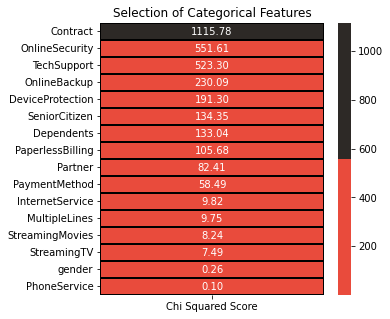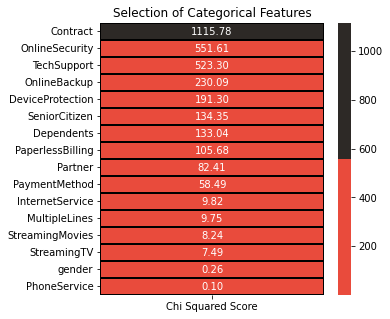

PhoneService, gender, StreamingTV, StreamingMovies, MultipleLines and InternetService display a very low relation with Churn.

In [ ]:

features = df1.loc[:,numerical_features]
target = df1.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

